In [ ]:
pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 501kB 14.4MB/s 
     |████████████████████████████████| 4.3MB 32.7MB/s 
     |████████████████████████████████| 51kB 4.3MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2.0.0-rc0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
X = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = cancer.target

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
X.shape

(569, 30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_train.shape

(455, 30)

In [ ]:
X_test.shape

(114, 30)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114,30,1)

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [ ]:
model.compile(optimizer=Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)


Train on 455 samples, validate on 114 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
455/455 [==============================] - 2s 4ms/sample - loss: 0.7792 - accuracy: 0.6484 - val_loss: 0.6416 - val_accuracy: 0.8947
Epoch 2/50
455/455 [==============================] - 0s 427us/sample - loss: 0.6050 - accuracy: 0.7341 - val_loss: 0.6124 - val_accuracy: 0.9298
Epoch 3/50
455/455 [==============================] - 0s 504us/sample - loss: 0.4785 - accuracy: 0.8132 - val_loss: 0.5811 - val_accuracy: 0.9561
Epoch 4/50
455/455 [==============================] - 0s 446us/sample - loss: 0.3951 - accuracy: 0.8462 - val_loss: 0.5487 - val_accuracy: 0.9561
Epoch 5/50
455/455 [==============================] - 0s 447us/sample - loss: 0.3689 - accuracy: 0.8462 - val_loss: 0.5159 - val_accuracy: 0.9561
Epoch 6/50
455/455 [==============================] - 0s 519us/sample - loss: 0.3081 - accuracy: 0.8747 - val_loss: 0.4828 - val_acc

In [ ]:

def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
history.history


{'accuracy': [0.64835167,
  0.73406595,
  0.8131868,
  0.84615386,
  0.84615386,
  0.8747253,
  0.8857143,
  0.8835165,
  0.8835165,
  0.8989011,
  0.8989011,
  0.9208791,
  0.92747253,
  0.9252747,
  0.92747253,
  0.9252747,
  0.9230769,
  0.94065934,
  0.9120879,
  0.92967033,
  0.94725275,
  0.94505495,
  0.93406594,
  0.93186814,
  0.94725275,
  0.94725275,
  0.95824176,
  0.95824176,
  0.95164835,
  0.95604396,
  0.93406594,
  0.94725275,
  0.95384616,
  0.96483517,
  0.9692308,
  0.94285715,
  0.95164835,
  0.95164835,
  0.96043956,
  0.96703297,
  0.95384616,
  0.96703297,
  0.95164835,
  0.94945055,
  0.9714286,
  0.95824176,
  0.9758242,
  0.96263736,
  0.95604396,
  0.96483517],
 'loss': [0.7791504959483723,
  0.6050110589016925,
  0.4785200041729015,
  0.3951470647866909,
  0.3688760809518479,
  0.308130817098932,
  0.2794636604550121,
  0.26415823318146087,
  0.2613479234278202,
  0.2409384434039776,
  0.22748838184954046,
  0.22250307784466952,
  0.2048635391334256,
  0.21

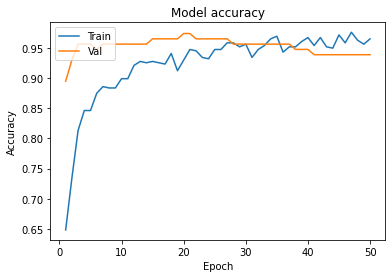

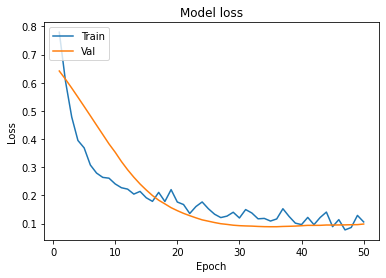

In [ ]:
plot_learningCurve(history, epochs)